# Como actividad de este módulo, vas a efectuar un análisis exploratorio de series de tiempo de manera que puedas realizar pronósticos simples mediante el método de promedios móviles.

# ¡Buena suerte!

### Paso a paso:

### Considera la información histórica diaria de precios para las empresas IBM y Walmart contenida en el sitio de Yahoo finance (http://finance.yahoo.com) durante los últimos 5 años. Nomenclatura  y componentes de las Series de Tiempo.

### Responde a la pregunta: ¿Existe alguna correlación entre los precios de las acciones de ambas empresas? Explica tanto de forma gráfica como a través del índice de correlación discutido en esta lección

### Obtén los gráficos de descomposición para ambas series de precios así como sus correlogramas. Interpreta tus resultados.

### Aplica e interpreta la prueba de Dickey-Fuller para ambas series.
### Haz un análisis gráfico de promedios móviles para ambas empresas y pronostica el siguiente día de cotizaciones. ¿Esperarías que dichos pronósticos sean buenos? Explica a detalle.


In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# Extraemos los dos DataSets

ibm_walmart = yf.download(tickers = 'IBM WMT', period = '5y', interval = '1mo', rounding = True)
ibm_walmart.head()

[*********************100%***********************]  2 of 2 completed


Price                     Adj Close          Close           High         \
Ticker                          IBM    WMT     IBM    WMT     IBM    WMT   
Date                                                                       
2019-11-01 00:00:00+00:00    101.47  36.75  128.54  39.70  133.02  41.79   
2019-12-01 00:00:00+00:00    102.35  36.67  128.15  39.61  130.42  40.71   
2020-01-01 00:00:00+00:00    109.75  35.48  137.41  38.16  139.38  39.96   
2020-02-01 00:00:00+00:00     99.38  33.37  124.43  35.89  151.77  39.98   
2020-03-01 00:00:00+00:00     85.59  35.22  106.05  37.87  130.11  42.69   

Price                         Low           Open            Volume             
Ticker                        IBM    WMT     IBM    WMT        IBM        WMT  
Date                                                                           
2019-11-01 00:00:00+00:00  126.91  39.03  128.59  39.31   67751825  349861800  
2019-12-01 00:00:00+00:00  124.94  39.14  128.54  39.72   75159179  295268100  
2020-01-01 00:00:00+00:00  127.34  37.56  129.06  39.62  118459187  383722500  
2020-02-01 00:00:00+00:00  120.80  34.79  137.91  38.30  123581342  397242300  
2020-03-01 00:00:00+00:00   86.58  34.00  125.00  35.87  198819809  956864400

In [3]:
ibm_walmart = ibm_walmart['Close']
ibm_walmart.head()

Ticker,IBM,WMT
Date,,
2019-11-01 00:00:00+00:00,128.54,39.70
2019-12-01 00:00:00+00:00,128.15,39.61
2020-01-01 00:00:00+00:00,137.41,38.16
2020-02-01 00:00:00+00:00,124.43,35.89
2020-03-01 00:00:00+00:00,106.05,37.87


In [34]:
rendimientos = IBM.pct_change()
rendimientos = rendimientos.dropna()
rendimientos

Ticker,IBM
Date,
2019-11-01 00:00:00+00:00,0.013453
2019-11-04 00:00:00+00:00,0.015822
2019-11-05 00:00:00+00:00,0.001596
2019-11-06 00:00:00+00:00,0.006448
2019-11-07 00:00:00+00:00,-0.007914
...,...
2024-10-24 00:00:00+00:00,-0.061697
2024-10-25 00:00:00+00:00,-0.017034
2024-10-28 00:00:00+00:00,-0.008199


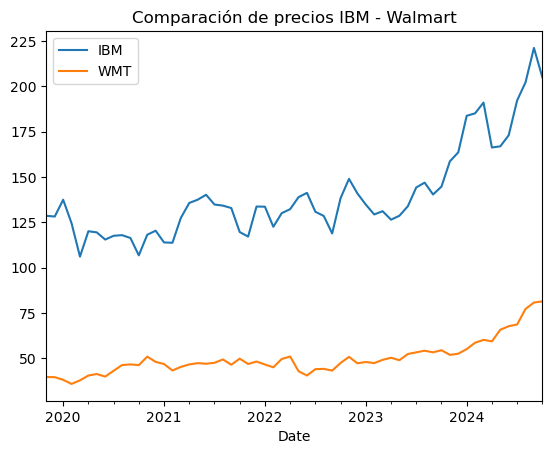

In [4]:
# graficamos 
ibm_walmart['IBM'].plot()
ibm_walmart['WMT'].plot()
plt.legend(['IBM', 'WMT'])
plt.title('Comparación de precios IBM - Walmart')
plt.show()

In [6]:
# Rendimientos
rend_ibm_wmt = ibm_walmart.pct_change()
rend_ibm_wmt

Ticker,IBM,WMT
Date,,
2019-11-01 00:00:00+00:00,NaN,NaN
2019-12-01 00:00:00+00:00,-0.003034,-0.002267
2020-01-01 00:00:00+00:00,0.072259,-0.036607
2020-02-01 00:00:00+00:00,-0.094462,-0.059486
2020-03-01 00:00:00+00:00,-0.147714,0.055169
2020-04-01 00:00:00+00:00,0.131919,0.069976
2020-05-01 00:00:00+00:00,-0.005248,0.020484
2020-06-01 00:00:00+00:00,-0.033079,-0.034341
2020-07-01 00:00:00+00:00,0.017928,0.080140


In [7]:
# eliminamos los NAN

rend_ibm_wmt = rend_ibm_wmt.dropna()
rend_ibm_wmt

Ticker,IBM,WMT
Date,,
2019-12-01 00:00:00+00:00,-0.003034,-0.002267
2020-01-01 00:00:00+00:00,0.072259,-0.036607
2020-02-01 00:00:00+00:00,-0.094462,-0.059486
2020-03-01 00:00:00+00:00,-0.147714,0.055169
2020-04-01 00:00:00+00:00,0.131919,0.069976
2020-05-01 00:00:00+00:00,-0.005248,0.020484
2020-06-01 00:00:00+00:00,-0.033079,-0.034341
2020-07-01 00:00:00+00:00,0.017928,0.080140
2020-08-01 00:00:00+00:00,0.003063,0.073035


### Aplicamos la Nomenclatura y componentes de las series de tiempo

In [8]:
# Calculamos la correalción 

correlacion = rend_ibm_wmt['IBM'].corr(rend_ibm_wmt['WMT'])
print('Correlación entre IBM y Walmart: ',correlacion)

Correlación entre IBM y Walmart:  0.2770463660898834


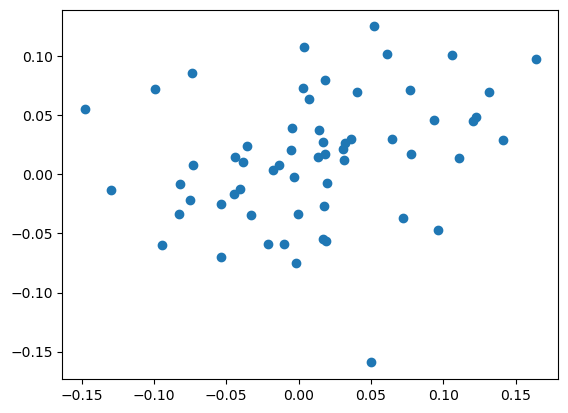

In [9]:
# graficamos
plt.scatter(rend_ibm_wmt['IBM'], rend_ibm_wmt['WMT'])
plt.show()

* ¿Existe alguna correlación entre los precios de las acciones de ambas empresas? 
* Observando la Gráfica y la correlación, vemos que no hay relación entre los precios de ambas acciones

In [11]:
# podemos corroborar esta correlación con el modelo de regresión simple
import statsmodels.api as sm
rend_ibm_wmt = sm.add_constant(rend_ibm_wmt)
rend_ibm_wmt

,const,IBM,WMT
Date,,,
2019-12-01 00:00:00+00:00,1.0,-0.003034,-0.002267
2020-01-01 00:00:00+00:00,1.0,0.072259,-0.036607
2020-02-01 00:00:00+00:00,1.0,-0.094462,-0.059486
2020-03-01 00:00:00+00:00,1.0,-0.147714,0.055169
2020-04-01 00:00:00+00:00,1.0,0.131919,0.069976
2020-05-01 00:00:00+00:00,1.0,-0.005248,0.020484
2020-06-01 00:00:00+00:00,1.0,-0.033079,-0.034341
2020-07-01 00:00:00+00:00,1.0,0.017928,0.080140
2020-08-01 00:00:00+00:00,1.0,0.003063,0.073035


In [12]:
regresion = sm.OLS(rend_ibm_wmt['IBM'], rend_ibm_wmt[['const', 'WMT']]).fit()

In [13]:
print(regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4.739
Date:                Wed, 30 Oct 2024   Prob (F-statistic):             0.0336
Time:                        21:40:01   Log-Likelihood:                 77.323
No. Observations:                  59   AIC:                            -150.6
Df Residuals:                      57   BIC:                            -146.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.009      0.610      0.5

In [14]:
# calculamos el indice de correlación
autocorrelacion = rend_ibm_wmt['IBM'].autocorr()
autocorrelacion

-0.014759191403178598

In [19]:
autocorrelacion = ibm_walmart['IBM'].autocorr()
autocorrelacion

0.9267057150281207

In [20]:
IBM = yf.download(tickers = 'IBM', period = '5y', interval = '1d', rounding = True)
IBM = IBM['Close']

[*********************100%***********************]  1 of 1 completed


In [22]:
# aplicamos las diferencias consecutivas
IBM_diff = IBM.diff()
IBM_diff

Ticker,IBM
Date,
2019-10-31 00:00:00+00:00,NaN
2019-11-01 00:00:00+00:00,1.72
2019-11-04 00:00:00+00:00,2.05
2019-11-05 00:00:00+00:00,0.21
2019-11-06 00:00:00+00:00,0.85
...,...
2024-10-24 00:00:00+00:00,-14.36
2024-10-25 00:00:00+00:00,-3.72
2024-10-28 00:00:00+00:00,-1.76


In [24]:
autocorr_diff = IBM_diff['IBM'].autocorr()
autocorr_diff

-0.0291691800424556

In [26]:
# generacion de la funcion de utocorrelacion
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [27]:
acf_array = acf(IBM)
acf_array

array([1.        , 0.99345266, 0.98670695, 0.97950292, 0.97211519,
       0.96441491, 0.95518912, 0.9463187 , 0.93675462, 0.92763549,
       0.91782713, 0.9077393 , 0.89782   , 0.88793764, 0.87833055,
       0.86865654, 0.85938242, 0.85033942, 0.84149532, 0.8327977 ,
       0.82426098, 0.81624398, 0.80811862, 0.80021112, 0.79196781,
       0.78383544, 0.77621711, 0.76869266, 0.76093226, 0.75337665,
       0.74611517])

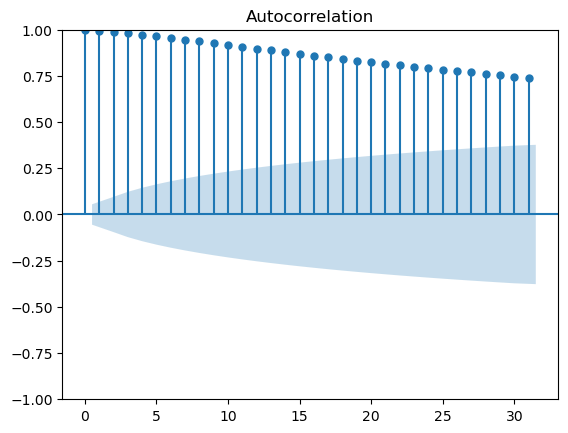

In [28]:
plot_acf(IBM, alpha = 0.05)
plt.show()

In [35]:
rendimientos = rendimientos.dropna()
acf_rend = acf(rendimientos)
print(acf_rend)

[ 1.00000000e+00 -6.88977982e-02  5.26747789e-02 -2.36832375e-02
 -2.45647724e-02  7.65622144e-02 -7.96770841e-02  1.34745538e-01
 -1.06537573e-01  9.48817480e-02  2.36408333e-05 -1.31366271e-02
 -1.90885706e-02 -4.21350835e-02  4.16877608e-02 -9.06925715e-02
  5.64904688e-02 -3.00199264e-02 -1.45474234e-02 -4.64945311e-03
 -4.55443796e-02  2.22553267e-02 -6.55883319e-02  4.64812027e-02
 -4.35328914e-02 -5.05222615e-02 -2.08037798e-02  3.28265723e-02
 -7.18823228e-03  1.74159733e-02 -3.66072399e-02]


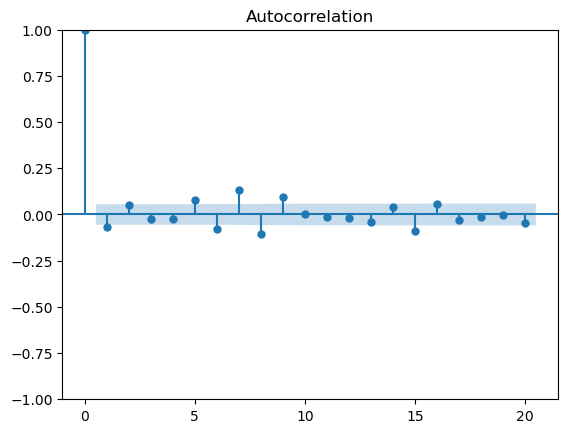

In [36]:
plot_acf(rendimientos, alpha = 0.05, lags = 20)
plt.show()

In [58]:
# Prueba de caminata aleatoria, hay 2 hipotesis
# H0: Se tiene un proceso de Caminata Aleatoria
# Ha: No se tiene un proceso de Caminata Aleatoria.

from statsmodels.tsa.stattools import adfuller
import numpy as np

# generación de 500 pasos aleatorios

np.random.seed(1)
steps = np.random.normal(loc = 0.001, scale = 0.01, size = 200) +1

In [95]:
steps[0] = 2
p = 100 * np.cumprod(steps)

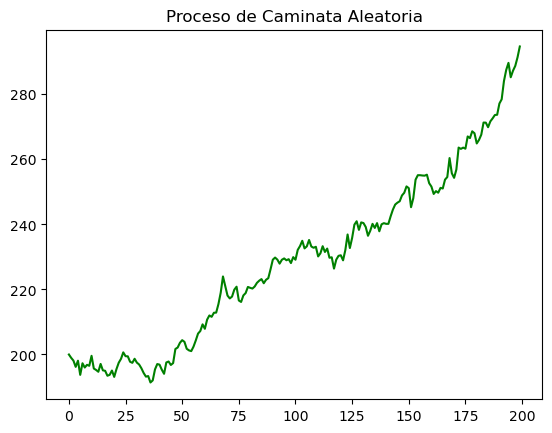

In [96]:
# Graficamos los precios simulados

plt.plot(p, color = 'green')
plt.title('Proceso de Caminata Aleatoria')
plt.show()

In [97]:
resultado = adfuller(p)
print('El resultado de p en la prueba es :', resultado[1])

El resultado de p en la prueba es : 0.9989986444709306


## 0.99, indica que no hay suficiente evidencia para rechazar la hipótesis nula de que la serie no es estacionaria.

In [98]:
# Prueba Dickey Fuller para los precios de IBM
resultado = adfuller(IBM)
print('El resultado de p en la prueba es:', resultado[1])

El resultado de p en la prueba es: 0.7347657589182868


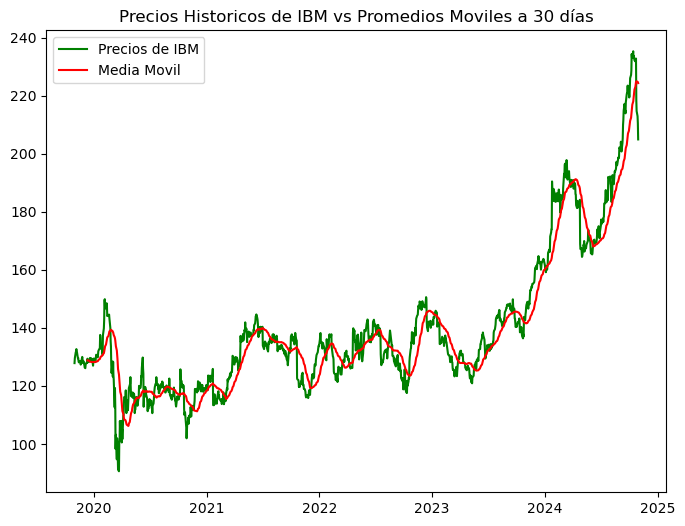

In [99]:
rolling_ibm = IBM.rolling(30).mean()

plt.figure(figsize=(8,6))
plt.plot(IBM, label = 'Precios de IBM', color = 'green')
plt.plot(rolling_ibm, label = 'Media Movil', color = 'red')
plt.title('Precios Historicos de IBM vs Promedios Moviles a 30 días')
plt.legend()
plt.show()

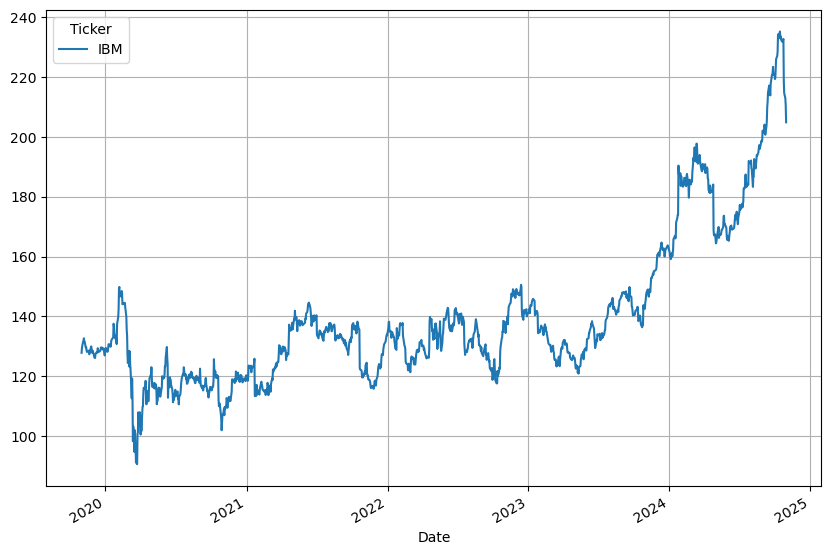

In [100]:
# Descomposición de la serie de tiempo
IBM.plot(figsize=(10,7)).grid()

In [101]:
decomposed_ibm = sm.tsa.seasonal_decompose(IBM, period = 30)

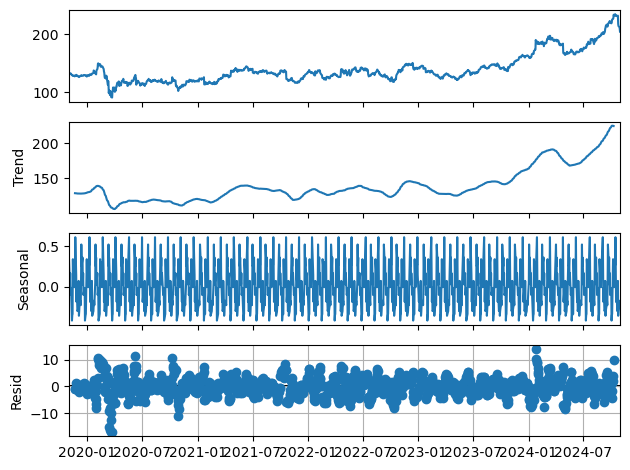

In [102]:
figure = decomposed_ibm.plot()
plt.grid()
plt.show()

### Realizamos Predicciones
** Predicción Simple mediante promedios moviles

In [103]:
IBM.shape

(1258, 1)

In [104]:
len_train = int(1259 * 0.8)
len_train

1007

In [105]:
# Grupos de entrenamiento y prueba
train = IBM[0:len_train]
test = IBM[len_train:]

In [106]:
len(train)

1007

In [107]:
len(test)

251

In [137]:
#y_pred = IBM.copy()
#y_pred = pd.DataFrame(y_pred)
ibm_data = IBM.copy()
ibm_data = pd.DataFrame(ibm_data)

In [138]:
ibm_data['promedio_movil'] = ibm_data.rolling(30).mean()

In [112]:
y_pred = ibm_data.copy()
y_pred['pronostico'][29] = 'NaN' 
for contador in range(30, 1258):
    y_pred['pronostico'][contador] = y_pred['pronostico'][contador]
y_pred[0:35]

Ticker,IBM,pronostico
Date,,
2019-10-31 00:00:00+00:00,127.85,NaN
2019-11-01 00:00:00+00:00,129.57,NaN
2019-11-04 00:00:00+00:00,131.62,NaN
2019-11-05 00:00:00+00:00,131.83,NaN
2019-11-06 00:00:00+00:00,132.68,NaN
2019-11-07 00:00:00+00:00,131.63,NaN
2019-11-08 00:00:00+00:00,131.56,NaN
2019-11-11 00:00:00+00:00,129.51,NaN
2019-11-12 00:00:00+00:00,129.63,NaN


In [113]:
y_pred = pd.DataFrame(y_pred['pronostico'][1007:])
y_pred

,pronostico
Date,
2023-11-01 00:00:00+00:00,141.566
2023-11-02 00:00:00+00:00,141.553667
2023-11-03 00:00:00+00:00,141.586667
2023-11-06 00:00:00+00:00,141.669667
2023-11-07 00:00:00+00:00,141.856
...,...
2024-10-24 00:00:00+00:00,224.896333
2024-10-25 00:00:00+00:00,224.892333
2024-10-28 00:00:00+00:00,224.750667


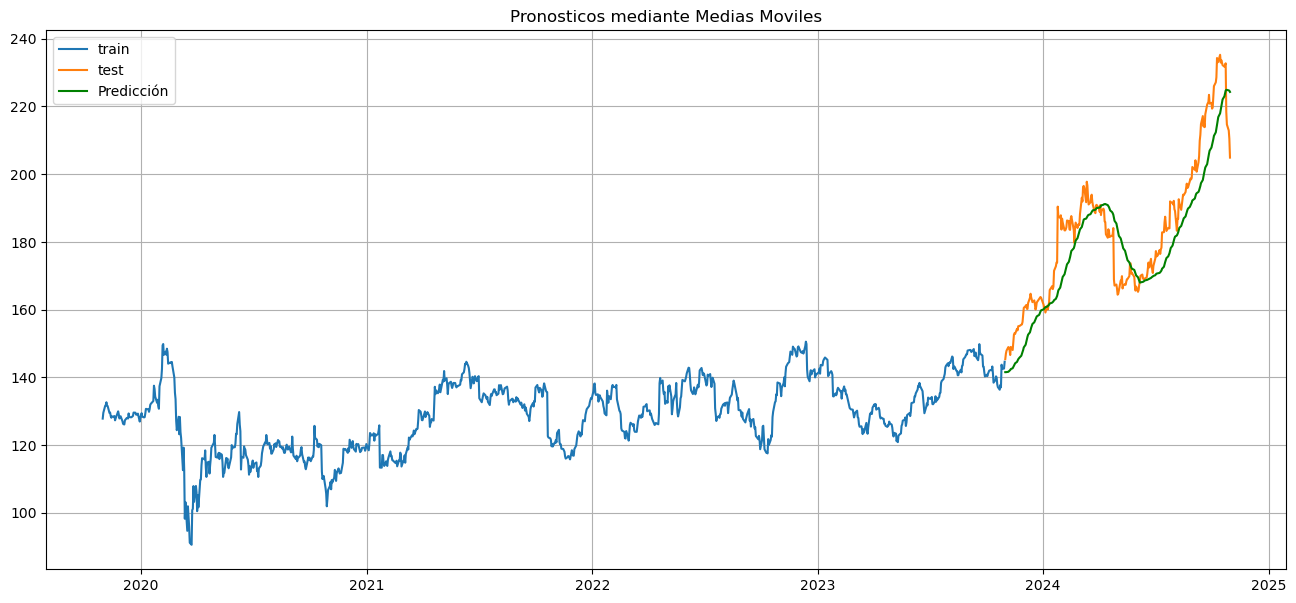

In [114]:
# Gtraficamos
plt.figure(figsize = (16,7))
plt.grid()
plt.plot(train, label = 'train')
plt.plot(test, label= 'test')
plt.plot(y_pred['pronostico'], label = 'Predicción', color = 'green')
plt.legend()
plt.title('Pronosticos mediante Medias Moviles')
plt.show()

In [115]:
test = pd.DataFrame(test)

In [116]:
res = pd.concat([test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
res.columns = ['Observado', 'pronostico']

In [118]:
# Evaluamos los pronosticos

from sklearn.metrics import mean_squared_error

In [119]:
# primero obtenemos el rmse (raiz cuadradico medio,  mean_squared_error)

rmse = np.sqrt(mean_squared_error(test, y_pred)).round(2)
mape = np.round(np.mean(np.abs((test['IBM'] - y_pred['pronostico']) / test['IBM'])) * 100, 2)

In [120]:
print('RMSE: ', rmse, 'Mape: ', mape)

RMSE:  9.58 Mape:  4.34


### En promedio cuando hacemos pronosticos, nos equivocamos 9.58 dlls y eso equivale a 4.34% que es nuestro error promedio absuloto hacia arriba o hacia abajo

In [134]:
# Pronóstico: tomar el último valor calculado del promedio móvil como estimación para el siguiente día
ultimo_promedio_movil = ibm_data['promedio_movil'].iloc[-1]

# Crear una fecha adicional para el 1 de noviembre de 2024
proximo_dia = pd.Timestamp('2024-11-01')

# Crear un nuevo DataFrame para almacenar la fecha y el pronóstico
pronostico = pd.DataFrame({'Close': [np.nan], 'promedio_movil': [ultimo_promedio_movil]}, index=[proximo_dia])

# Concatenar el pronóstico al final de los datos existentes
ibm_data = pd.concat([ibm_data, pronostico])

# Imprimir el pronóstico
print("Pronóstico para el 1 de noviembre de 2024:",ultimo_promedio_movil)

Pronóstico para el 1 de noviembre de 2024: 224.29266666666666
